In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
plt.rc('font',family='Malgun Gothic')

In [4]:
data_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'

In [67]:
with open(data_dir+'final_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [68]:
data

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2018-08-19,242960.0,486,887,16835.00,5305.00,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4
294,2018-08-26,242960.0,486,887,17555.00,5207.50,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4
295,2018-09-02,215750.0,486,887,18369.00,5548.00,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1
296,2018-09-09,215750.0,486,887,18757.00,5754.00,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3


#  한우 가격의 이동평균

* 농수산물 가격 예측시 4~5일 기준의 이동평균가격을 사용한다고 함
        - https://www.kamis.or.kr/customer/price/product/item.do

- 단순이동평균 : 과거의 특정 기간(사용자가 설정) 데이터의 평균값으로 계속 이어서 냄
- 지수이동평균 : 보다 최근의 값에 가중치를 둠 (EMA) -> ``농수산물 딥러닝 레퍼런스에는 지수이동평균(EMA)를 사용함``
- 가중이동평균 : 현재에 가까운 값에 더 큰 가중치를 둠 

In [69]:
import seaborn as sns

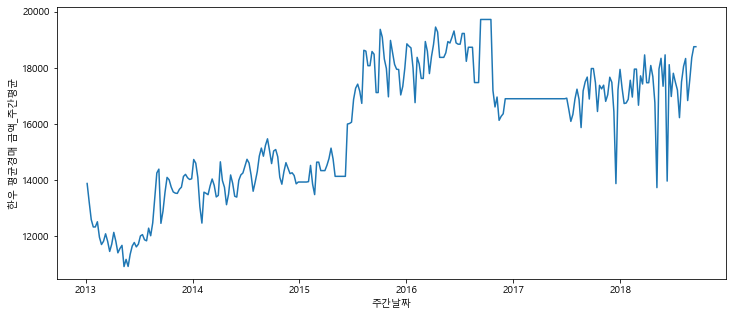

In [70]:
plt.figure(figsize=(12,5))
sns.lineplot(data=data, x='주간날짜', y='한우 평균경매 금액_주간평균')

## 단순이동평균(SMA)

### m=5 일때 한우가격(y값)의 단순이동평균

In [71]:
# sma : 단순이동평균 
# m=5일때
data['sma5'] = data['한우 평균경매 금액_주간평균'].rolling(5).mean()
# m=5 이동평균으로 인해 정보손실된 초기 데이터들은 가장 근접한 데이터로 결측치 채워주기
data['sma5'] = data['sma5'].fillna(12865.352)
data.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma5
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,12865.352
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,12865.352
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,12865.352
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,12865.352
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12865.352


In [72]:
# 그래프 한번에 표시하기 위해서 두 칼럼만 존재하는 데이터프레임 따로 만들기(어차피 주간날짜 범위는 동일하니까)
y_vs_sma5 = data[['한우 평균경매 금액_주간평균', 'sma5']]
y_vs_sma5.head()

,한우 평균경매 금액_주간평균,sma5
0,13875.60,12865.352
1,13213.33,12865.352
2,12588.83,12865.352
3,12323.83,12865.352
4,12325.17,12865.352


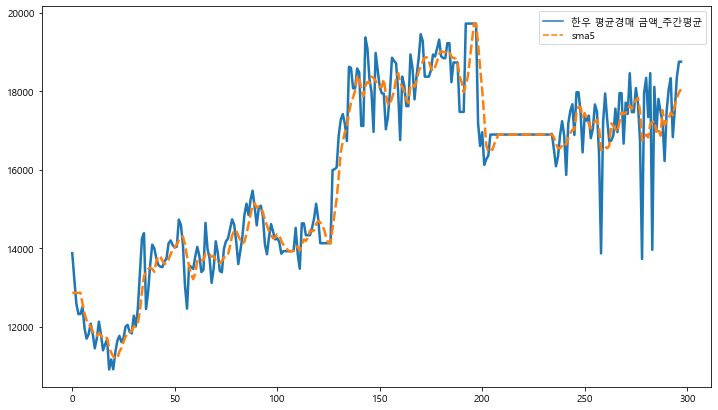

In [73]:
# 한우 가격 이동평균한 값과 실제 한우가격 비교
plt.figure(figsize=(12,7))
sns.lineplot(data=y_vs_sma5, palette="tab10", linewidth=2.5)

### m=4 일때 한우가격(y값)의 단순이동평균

In [74]:
data['sma4'] = data['한우 평균경매 금액_주간평균'].rolling(4).mean()
data['sma4'] = data['sma4'].fillna(13000.3975)
data.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma5,sma4
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,12865.352,13000.3975
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,12865.352,13000.3975
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,12865.352,13000.3975
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,12865.352,13000.3975
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12865.352,12612.7900


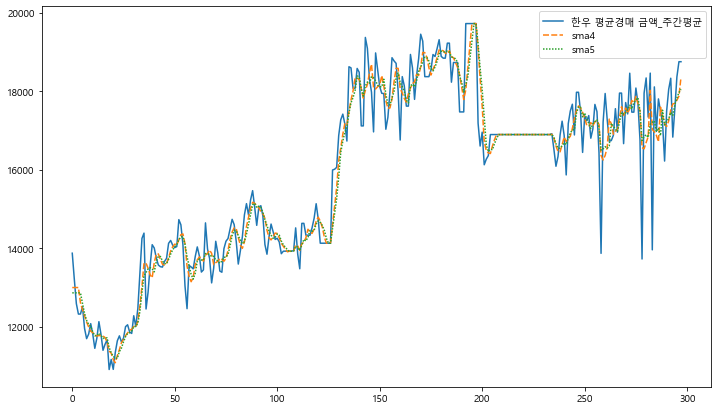

In [75]:
y_vs_sma4 = data[['한우 평균경매 금액_주간평균','sma4','sma5']]
plt.figure(figsize=(12,7))
sns.lineplot(data=y_vs_sma4, palette="tab10", linewidth=1.5)

In [81]:
print(f"한우가격과 m=4일때 단순이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['sma4'])**2).mean())}")
print(f"한우가격과 m=5일때 단순이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['sma5'])**2).mean())}")

한우가격과 m=4일때 단순이동평균 RMSE : 589.3914774787115
한우가격과 m=5일때 단순이동평균 RMSE : 615.6170212013565


### m=10 일때 한우가격(y값)의 단순이동평균### 

In [79]:
# m=10일때도 한 번 해볼까..?
data['sma10'] = data['한우 평균경매 금액_주간평균'].rolling(10).mean()
data['sma10'] = data['sma10'].fillna(12438.691)
data.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,...,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma5,sma4,ema5,ema4,sma10
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,...,-4.6,5.4,-2.5,16.0,29.6,12865.352,13000.3975,13875.600000,13875.600000,12438.691
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,...,-2.2,6.1,0.0,30.0,49.6,12865.352,13000.3975,13514.361818,13507.672222,12438.691
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,...,-2.2,2.7,0.1,40.0,64.9,12865.352,13000.3975,13148.217363,13131.097541,12438.691
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,...,-0.9,9.3,0.4,40.0,63.0,12865.352,13000.3975,12882.840805,12857.632927,12438.691
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,...,-1.9,4.5,0.8,22.0,48.4,12865.352,12612.7900,12727.445973,12699.237244,12438.691


In [80]:
# RMSE값 다른거에 비해 너무 높다.. m값은 5나 4로써야할듯..
print(f"한우가격과 m=10일때 단순이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['sma10'])**2).mean())}")

한우가격과 m=10일때 단순이동평균 RMSE : 734.7831442703598


## 지수이동평균(EMA) => 초기값 정보 손실 없음

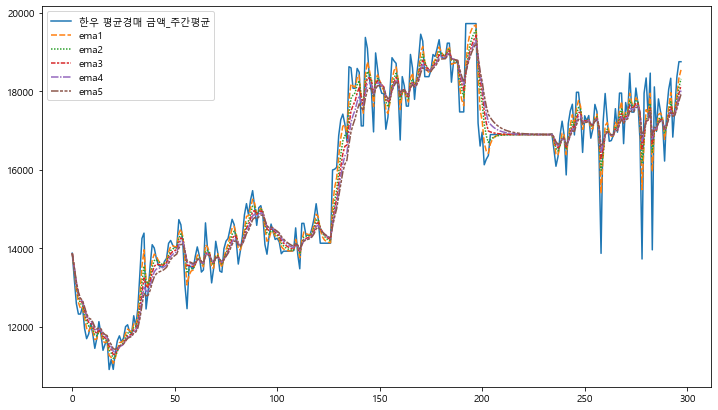

In [90]:
# m=1일때 지수이동평균값
data['ema1'] = data['한우 평균경매 금액_주간평균'].ewm(1).mean()
# m=2일때 지수이동평균값
data['ema2'] = data['한우 평균경매 금액_주간평균'].ewm(2).mean()
# m=3일때 지수이동평균값
data['ema3'] = data['한우 평균경매 금액_주간평균'].ewm(3).mean()
# m=4일 때 지수이동평균값
data['ema4'] = data['한우 평균경매 금액_주간평균'].ewm(4).mean()
# m=5일때 지수이동평균값
data['ema5'] = data['한우 평균경매 금액_주간평균'].ewm(5).mean()

# y와 ema 칼럼 데이터만 담은 데이터프레임 생성
y_vs_ema = data[['한우 평균경매 금액_주간평균','ema1','ema2','ema3','ema4','ema5']]

# 한꺼번에 lineplot그리기
plt.figure(figsize=(12,7))
sns.lineplot(data=y_vs_ema, palette='tab10', linewidth=1.5)

In [92]:
# RMSE값으로 측정해보기
print(f"한우가격과 m=1일때 지수이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['ema1'])**2).mean())}")
print(f"한우가격과 m=2일때 지수이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['ema2'])**2).mean())}")
print(f"한우가격과 m=3일때 지수이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['ema3'])**2).mean())}")
print(f"한우가격과 m=4일때 지수이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['ema4'])**2).mean())}")
print(f"한우가격과 m=5일때 지수이동평균 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['ema5'])**2).mean())}")


한우가격과 m=1일때 지수이동평균 RMSE : 365.19035508228336
한우가격과 m=2일때 지수이동평균 RMSE : 490.31845007425613
한우가격과 m=3일때 지수이동평균 RMSE : 564.0921773982362
한우가격과 m=4일때 지수이동평균 RMSE : 618.0412952206754
한우가격과 m=5일때 지수이동평균 RMSE : 661.9205729785272


- m = 1이될수록 RMSE값이 작아지는데 그럼 m = 1값으로 해야하나..?

## 농업관측본부에서는 5일 이동평균을 사용
 - 「5일이동평균」이란 전후 2일간을 포함한 5일간의 평균치

In [124]:
# 전후2일간의 데이터로  이동평균값 => 메소드가 없어 그냥 정의함...윾

y_series = data['한우 평균경매 금액_주간평균']
ma_y_list = []
for i in range(2,len(y_series)):
    
    ma_y = (y_series[i-2:i+3]).mean()
    ma_y_list.append(ma_y)
print(len(ma_y_list))
    

296


In [129]:
# 2부터 시작했으므로 index가 0,1인 번째에 대한 '5일 이동평균'값이 존재하지 않음
# index가 0,1의 value은 원래 데이터의 값을 넣어주자!
# index=0 인 value : 13875.60
# index=1 인 value : 13213.33

# 원하는 index위치에 element 삽입할 떄는 insert(위치, 값) 함수 사용하기!(새로운 변수에 할당안해도 됨)
ma_y_list.insert(0, 13875.60)
ma_y_list.insert(1, 13213.33)
ma_y_list

[13875.6,
 13213.33,
 12865.352,
 12592.282,
 12341.176000000001,
 12162.91,
 12061.064,
 12012.03,
 11872.74,
 11771.38,
 11773.919999999998,
 11837.119999999999,
 11784.079999999998,
 11701.480000000001,
 11722.2,
 11713.679999999998,
 11469.8,
 11340.279999999999,
 11243.080000000002,
 11201.710000000001,
 11197.029999999999,
 11368.63,
 11457.829999999998,
 11617.150000000001,
 11748.36,
 11829.720000000001,
 11849.319999999998,
 11892.679999999998,
 12006.7,
 12008.1,
 12091.9,
 12395.16,
 12879.494,
 13300.708000000002,
 13389.282000000001,
 13472.362,
 13508.511999999999,
 13476.738000000001,
 13400.863999999998,
 13660.529999999999,
 13798.570000000002,
 13792.12,
 13677.84,
 13609.439999999999,
 13607.960000000001,
 13718.280000000002,
 13852.079999999998,
 13963.88,
 14034.340000000002,
 14094.26,
 14215.086000000001,
 14294.820000000002,
 14296.874,
 14101.874,
 13785.434,
 13552.367999999999,
 13337.394,
 13214.539999999999,
 13363.905999999999,
 13678.666000000001,
 13727.

In [130]:
# '전후2일간 이동평균' 한 값들 새로운 칼럼으로 추가
data['전후2일_5일이동평균'] = np.array(ma_y_list)
data.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,...,sma5,sma4,ema5,ema4,sma10,ema10,ema3,ema2,ema1,전후2일_5일이동평균
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,...,12865.352,13000.3975,13875.600000,13875.600000,12438.691,13875.600000,13875.600000,13875.600000,13875.600000,13875.600
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,...,12865.352,13000.3975,13514.361818,13507.672222,12438.691,13528.696667,13497.160000,13478.238000,13434.086667,13213.330
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,...,12865.352,13000.3975,13148.217363,13131.097541,12438.691,13185.120030,13104.368649,13056.939474,12951.082857,12865.352
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,...,12865.352,13000.3975,12882.840805,12857.632927,12438.691,12938.109250,12818.914514,12752.417077,12616.548000,12592.282
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,...,12865.352,12612.7900,12727.445973,12699.237244,12438.691,12791.116677,12657.072522,12588.402796,12466.159355,12341.176


In [131]:
# RMSE값 비교해보자!
print(f"한우가격과 전후5일간 이동평균값과의 RMSE : {math.sqrt(((data['한우 평균경매 금액_주간평균'] - data['전후2일_5일이동평균'])**2).mean())}")

# 그냥 단순이동평균(m=5), 지수이동평균(m=5)일 때 보다 전후2일 5일 이동평균의 RMSE값이 더 낮음

한우가격과 전후5일간 이동평균값과의 RMSE : 531.8393603327273


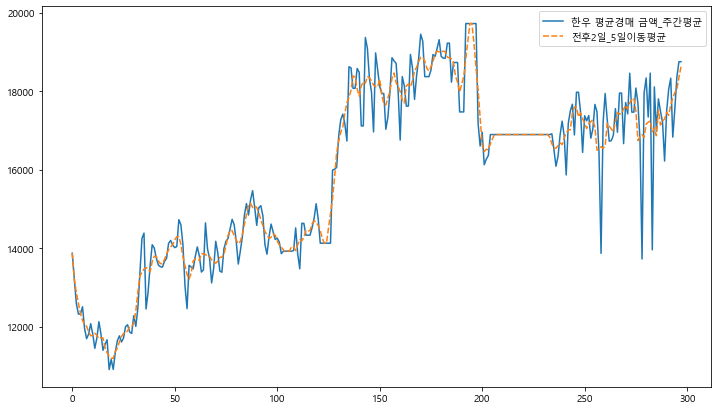

In [132]:
# 그래프로 그려보기
# ba5 = before after 5 = 전후2일_5일 이동평균
y_vs_ba5 = data[['한우 평균경매 금액_주간평균','전후2일_5일이동평균']]
plt.figure(figsize=(12,7))
sns.lineplot(data=y_vs_ba5, palette='tab10', linewidth=1.5)

In [134]:
# 필요없는 칼럼 삭제
not_columns = ['sma5','ema5','sma10','ema10']
data = data.drop(not_columns, axis=1).copy()
data.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,...,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma4,ema4,ema3,ema2,ema1,전후2일_5일이동평균
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,...,5.4,-2.5,16.0,29.6,13000.3975,13875.600000,13875.600000,13875.600000,13875.600000,13875.600
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,...,6.1,0.0,30.0,49.6,13000.3975,13507.672222,13497.160000,13478.238000,13434.086667,13213.330
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,...,2.7,0.1,40.0,64.9,13000.3975,13131.097541,13104.368649,13056.939474,12951.082857,12865.352
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,...,9.3,0.4,40.0,63.0,13000.3975,12857.632927,12818.914514,12752.417077,12616.548000,12592.282
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,...,4.5,0.8,22.0,48.4,12612.7900,12699.237244,12657.072522,12588.402796,12466.159355,12341.176


# 가격관련 칼럼들 전 주(week)와의 가격차이 칼럼 추가

In [147]:
pd.options.display.max_columns=40

In [139]:
# 1. 한우 가격 차이
data['한우 평균경매금액_차이'] = data['한우 평균경매 금액_주간평균'].diff()
data['한우 평균경매금액_차이'] = data['한우 평균경매금액_차이'].fillna(0)

In [142]:
# 2. 돼지탕박 가격 차이
data['돼지 탕박 경매금액_차이'] = data['돼지 탕박 경매 금액_주간평균'].diff()
data['돼지 탕박 경매금액_차이'] = data['돼지 탕박 경매금액_차이'].fillna(0)

In [146]:
# 3. 미국소_생산량(가격화된 값) 차이
data['미국소_생산량_차이'] = data['미국소_생산량(가격화한값)'].diff()
data['미국소_생산량_차이'] = data['미국소_생산량_차이'].fillna(0)

# 반입량(=소 개체수, 수입소고기총량) 차이 칼럼, '수출-수입' 칼럼 추가

In [154]:
# 1. 소 개체수 차이(번식우 아닌 소+1~2세 모든 소 합친 값에서 diff구하기)
data['소 개체수'] = data['번식우 아닌 소 중 1세 미만(암,수) 제외']+data['1~2세(모든 소)']
data['소 개체수_차이'] = data['소 개체수'].diff()
data['소 개체수_차이'] = data['소 개체수_차이'].fillna(0)
data = data.drop(['소 개체수'], axis=1)
data.head()


,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma4,ema4,ema3,ema2,ema1,전후2일_5일이동평균,한우 평균경매금액_차이,돼지 탕박 경매금액_차이,미국소_생산량_차이,소 개체수_차이
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,13000.3975,13875.600000,13875.600000,13875.600000,13875.600000,13875.600,0.00,0.00,0.0,0.0
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,13000.3975,13507.672222,13497.160000,13478.238000,13434.086667,13213.330,-662.27,-60.80,0.0,0.0
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,13000.3975,13131.097541,13104.368649,13056.939474,12951.082857,12865.352,-624.50,-80.00,0.0,0.0
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,13000.3975,12857.632927,12818.914514,12752.417077,12616.548000,12592.282,-265.00,55.67,0.0,0.0
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12612.7900,12699.237244,12657.072522,12588.402796,12466.159355,12341.176,1.34,-96.84,-38790.0,0.0


In [156]:
# 2. 수출-수입 칼럼 추가
data['수출-수입'] = data['수출 (100만달러)']-data['수입 (100만달러)']

In [158]:
# 3. 수입소고기 총량 차이 칼럼 추가
data['수입소고기_총량차이'] = data['수입소고기_총량'].diff()
data['수입소고기_총량차이'] = data['수입소고기_총량차이'].fillna(0)
data.head(2)

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma4,ema4,ema3,ema2,ema1,전후2일_5일이동평균,한우 평균경매금액_차이,돼지 탕박 경매금액_차이,미국소_생산량_차이,소 개체수_차이,수출-수입,수입소고기_총량차이
0,2013-01-06,226130.0,520,888,13875.60,3044.8,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,13000.3975,13875.600000,13875.60,13875.600,13875.600000,13875.60,0.00,0.0,0.0,0.0,44046,0.0
1,2013-01-13,226130.0,520,888,13213.33,2984.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,13000.3975,13507.672222,13497.16,13478.238,13434.086667,13213.33,-662.27,-60.8,0.0,0.0,44046,0.0


---

# 다시 이동평균값에 대해

In [162]:
data = data.rename(columns={'전후2일_5일이동평균':'한우가격_전후2일_5일이동평균'})
data.head(2)

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma4,ema4,ema3,ema2,ema1,한우가격_전후2일_5일이동평균,한우 평균경매금액_차이,돼지 탕박 경매금액_차이,미국소_생산량_차이,소 개체수_차이,수출-수입,수입소고기_총량차이
0,2013-01-06,226130.0,520,888,13875.60,3044.8,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,13000.3975,13875.600000,13875.60,13875.600,13875.600000,13875.60,0.00,0.0,0.0,0.0,44046,0.0
1,2013-01-13,226130.0,520,888,13213.33,2984.0,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,13000.3975,13507.672222,13497.16,13478.238,13434.086667,13213.33,-662.27,-60.8,0.0,0.0,44046,0.0


## 돼지탕박가격에 전후2일 적용한 5일 이동평균

In [163]:
# 전후2일간의 데이터로  이동평균값

pig_series = data['돼지 탕박 경매 금액_주간평균']
ma_pig_list = []
for i in range(2,len(pig_series)):
    
    ma_pig = (pig_series[i-2:i+3]).mean()
    ma_pig_list.append(ma_pig)
print(len(ma_pig_list))

296


In [164]:
# 2부터 시작했으므로 index가 0,1인 번째에 대한 '5일 이동평균'값이 존재하지 않음
# index가 0,1의 value은 원래 데이터의 값을 넣어주자!
# index=0 인 value : 3044.8
# index=1 인 value : 2984.0

# 원하는 index위치에 element 삽입할 떄는 insert(위치, 값) 함수 사용하기!(새로운 변수에 할당안해도 됨)
ma_pig_list.insert(0, 3044.8)
ma_pig_list.insert(1, 2984.0)

# np.array로 해서 기존 data에 칼럼으로 추가
data['돼지탕박가격_전후2일_5일이동평균'] = np.array(ma_pig_list)
data.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),sma4,ema4,ema3,ema2,ema1,한우가격_전후2일_5일이동평균,한우 평균경매금액_차이,돼지 탕박 경매금액_차이,미국소_생산량_차이,소 개체수_차이,수출-수입,수입소고기_총량차이,돼지탕박가격_전후2일_5일이동평균
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6,13000.3975,13875.600000,13875.600000,13875.600000,13875.600000,13875.600,0.00,0.00,0.0,0.0,44046,0.0,3044.80
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6,13000.3975,13507.672222,13497.160000,13478.238000,13434.086667,13213.330,-662.27,-60.80,0.0,0.0,44046,0.0,2984.00
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,13000.3975,13131.097541,13104.368649,13056.939474,12951.082857,12865.352,-624.50,-80.00,0.0,0.0,44046,0.0,2951.06
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,13000.3975,12857.632927,12818.914514,12752.417077,12616.548000,12592.282,-265.00,55.67,0.0,0.0,44046,0.0,2763.90
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12612.7900,12699.237244,12657.072522,12588.402796,12466.159355,12341.176,1.34,-96.84,-38790.0,0.0,44046,-10382.0,2748.70


In [165]:
print(f"돼지탕박가격과 전후2일_5일이동평균 돼지탕박가격과의  RMSE : {math.sqrt(((data['돼지 탕박 경매 금액_주간평균'] - data['돼지탕박가격_전후2일_5일이동평균'])**2).mean())}")
# 단위가 천원 단위인데 RMSE값이 295 

돼지탕박가격과 전후2일_5일이동평균 돼지탕박가격과의  RMSE : 295.1860117113969


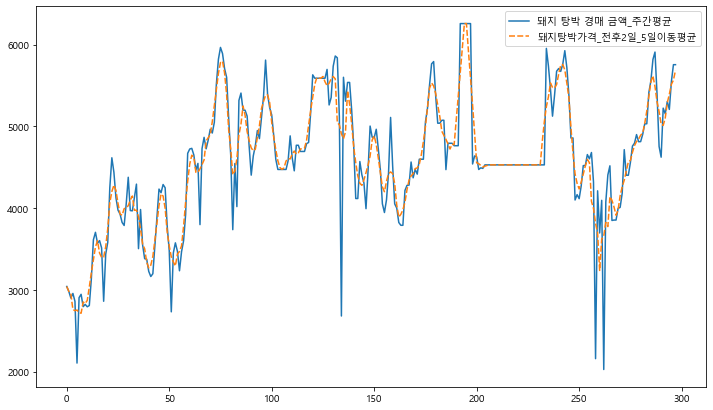

In [166]:
# raw 데이터 돼지탕박 가격과 이동평균시킨 돼지탕박가격 비교 그래프
plt.figure(figsize=(12,7))
sns.lineplot(data=data[['돼지 탕박 경매 금액_주간평균',
                       '돼지탕박가격_전후2일_5일이동평균']], palette='tab10', linewidth=1.5)

In [168]:
# 칼럼명 순서 정리..
cols = ['주간날짜','미국소_생산량(가격화한값)','미국소_생산량_차이','번식우 아닌 소 중 1세 미만(암,수) 제외',
        '1~2세(모든 소)','소 개체수_차이','수출 (100만달러)','수입 (100만달러)','수출-수입',
        '수입소고기_총량','수입소고기_총량차이','소비자물가지수 (2010=100)','평균기온','최저기온','최고기온',
        '평균지면온도','최소상대습도(%)','평균상대습도(%)','돼지 탕박 경매 금액_주간평균','돼지 탕박 경매금액_차이',
        '돼지탕박가격_전후2일_5일이동평균','한우 평균경매금액_차이','한우가격_전후2일_5일이동평균',
        'sma4','ema4','ema3','ema2','ema1','한우 평균경매 금액_주간평균']
data = data[cols].copy()
data.head(1)

,주간날짜,미국소_생산량(가격화한값),미국소_생산량_차이,"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),소 개체수_차이,수출 (100만달러),수입 (100만달러),수출-수입,수입소고기_총량,수입소고기_총량차이,소비자물가지수 (2010=100),평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),돼지 탕박 경매 금액_주간평균,돼지 탕박 경매금액_차이,돼지탕박가격_전후2일_5일이동평균,한우 평균경매금액_차이,한우가격_전후2일_5일이동평균,sma4,ema4,ema3,ema2,ema1,한우 평균경매 금액_주간평균
0,2013-01-06,226130.0,0.0,520,888,0.0,559632,515586,44046,28623,0.0,98,-0.3,-4.6,5.4,-2.5,16.0,29.6,3044.8,0.0,3044.8,0.0,13875.6,13000.3975,13875.6,13875.6,13875.6,13875.6,13875.6


In [192]:
# pickle파일로 저장하기
fold_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'
with open(fold_dir+'extra_feature_data.pkl', 'wb') as f:
    pickle.dump(ex_data, f)

In [171]:
ex_data = data.copy()

In [187]:
# 3월 9일 평균지면온도 0.7 이므로 3월 2일 결측치값 대체 
# 5월 25일 평균지면온도 29 이므로 5월 31일 결측치값 대체
ex_data.loc[ex_data['주간날짜'] == '2014-03-02', '평균지면온도'] = 0.7
ex_data.loc[ex_data['주간날짜'] == '2015-05-31', '평균지면온도'] = 29

In [188]:
ex_data.isnull().sum()

주간날짜                        0
미국소_생산량(가격화한값)              0
미국소_생산량_차이                  0
번식우 아닌 소 중 1세 미만(암,수) 제외    0
1~2세(모든 소)                  0
소 개체수_차이                    0
수출 (100만달러)                 0
수입 (100만달러)                 0
수출-수입                       0
수입소고기_총량                    0
수입소고기_총량차이                  0
소비자물가지수 (2010=100)          0
평균기온                        0
최저기온                        0
최고기온                        0
평균지면온도                      0
최소상대습도(%)                   0
평균상대습도(%)                   0
돼지 탕박 경매 금액_주간평균            0
돼지 탕박 경매금액_차이               0
돼지탕박가격_전후2일_5일이동평균          0
한우 평균경매금액_차이                0
한우가격_전후2일_5일이동평균            0
sma4                        0
ema4                        0
ema3                        0
ema2                        0
ema1                        0
한우 평균경매 금액_주간평균             0
dtype: int64

In [7]:
with open(data_dir+'extra_feature_data.pkl', 'rb') as f:
    data = pickle.load(f)
data.shape

(298, 29)

In [9]:
pd.options.display.max_columns=30
data.head(1)

,주간날짜,미국소_생산량(가격화한값),미국소_생산량_차이,"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),소 개체수_차이,수출 (100만달러),수입 (100만달러),수출-수입,수입소고기_총량,수입소고기_총량차이,소비자물가지수 (2010=100),평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),돼지 탕박 경매 금액_주간평균,돼지 탕박 경매금액_차이,돼지탕박가격_전후2일_5일이동평균,한우 평균경매금액_차이,한우가격_전후2일_5일이동평균,sma4,ema4,ema3,ema2,ema1,한우 평균경매 금액_주간평균
0,2013-01-06,226130.0,0.0,520,888,0.0,559632,515586,44046,28623,0.0,98,-0.3,-4.6,5.4,-2.5,16.0,29.6,3044.8,0.0,3044.8,0.0,13875.6,13000.3975,13875.6,13875.6,13875.6,13875.6,13875.6


In [12]:
ex_data = data.copy()

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

features = ['미국소_생산량(가격화한값)','미국소_생산량_차이','번식우 아닌 소 중 1세 미만(암,수) 제외',
            '1~2세(모든 소)','소 개체수_차이','수출 (100만달러)','수입 (100만달러)','수출-수입',
            '수입소고기_총량','수입소고기_총량차이','소비자물가지수 (2010=100)','평균기온','최저기온','최고기온',
            '평균지면온도','최소상대습도(%)','평균상대습도(%)','돼지 탕박 경매 금액_주간평균','돼지 탕박 경매금액_차이',
            '돼지탕박가격_전후2일_5일이동평균','한우 평균경매금액_차이','한우가격_전후2일_5일이동평균']

# Timeseries Split으로 Cross validation
ts_split = TimeSeriesSplit(n_splits=5)

accrs = []
fold_idx = 1
for train_idx, test_idx in ts_split.split(ex_data):
    print(f'Fold 횟수 : {fold_idx}')
    
    train_d, test_d = ex_data.iloc[train_idx], ex_data.iloc[test_idx]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    train_x = scaler.fit_transform(train_x)

    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    test_x = scaler.fit_transform(test_x)

    # 하이퍼파라미터 : 은닉층 사이즈, iter횟수, alpha값= L2 정규화term 파라미터
    # 블로그 조언 : 은닉층사이즈와 max_iter횟수를 크게,늘리면서 성능이 높아지는  경향..!
    # warning 뜨면 최적화가 덜 되었다는 의미 => max_iter를 조절해보자!
    # max_iter : epoch 횟수 
    model = MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, batch_size=10)
    model.fit(train_x, train_y)
    
    mean_accr = model.score(test_x, test_y)
    accrs.append(mean_accr)
    
    fold_idx += 1 
print(np.average(accrs))
    

'''
    # train 데이터의 mse, mae 값 
    train_pred = model.predict(train_x)
    train_mse = mean_squared_error(train_y, train_pred)
    train_mae = mean_absolute_error(train_y, train_pred)
    train_mean_accuracy = model.score(train_x, train_y)
    # test 데이터의 mse, mae 값
    test_pred = model.predict(test_x)
    test_mse = mean_squared_error(test_y, test_pred)
    test_mae = mean_absolute_error(test_y, test_pred)
    test_mean_accuracy = model.score(test_x, test_y)

print('Train MSE :', train_mse)
print('Train MAE :', train_mae)
print('Train Accuracy :', train_mean_accuracy)
print('Train r2 Score : ',r2_score(train_y, model.predict(train_x)))

print('Test MSE :', test_mse)
print('Test MAE :', test_mae)
print('Test Accuracy :', test_mean_accuracy)
print('Test r2 Score : ',r2_score(test_y, model.predict(test_x)))
'''


# MLP regressor는 과적합되기 쉬우므로 cross validation 해보기(Timeseries Crossvalidation 사용)
# *****변수 feature 뭐쓸지 더 고려해보기(이동평균값들 중 어떤거!? )******
# 모델과 실제값 그래프로 어떻게 비교하지?
# eclass 머신러닝 실습 단계 살펴보면서 checking해보기 -> 우선 추가 metric
# MLPRegressor 인자(매개변수)들 의미 파악하기




##### 이 cell은 제 노트북이 너무 오래걸려서 하다가 중단했습니다 ㅜㅜ
#### 이 모델링이전 cross valadation하지 않은 모델링은 r2 score가 train은 0.97, test는 0.80까지 출력되는것은 확인했습니다!

Fold 횟수 : 1


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Fold 횟수 : 2


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Fold 횟수 : 3


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Fold 횟수 : 4


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Fold 횟수 : 5
-642.5244782166294


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


"\n    # train 데이터의 mse, mae 값 \n    train_pred = model.predict(train_x)\n    train_mse = mean_squared_error(train_y, train_pred)\n    train_mae = mean_absolute_error(train_y, train_pred)\n    train_mean_accuracy = model.score(train_x, train_y)\n    # test 데이터의 mse, mae 값\n    test_pred = model.predict(test_x)\n    test_mse = mean_squared_error(test_y, test_pred)\n    test_mae = mean_absolute_error(test_y, test_pred)\n    test_mean_accuracy = model.score(test_x, test_y)\n\nprint('Train MSE :', train_mse)\nprint('Train MAE :', train_mae)\nprint('Train Accuracy :', train_mean_accuracy)\nprint('Train r2 Score : ',r2_score(train_y, model.predict(train_x)))\n\nprint('Test MSE :', test_mse)\nprint('Test MAE :', test_mae)\nprint('Test Accuracy :', test_mean_accuracy)\nprint('Test r2 Score : ',r2_score(test_y, model.predict(test_x)))\n"